# Tarea 5. Construyendo la frontera de mínima varianza para dos activos.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/08/Pareto_Efficient_Frontier_for_the_Markowitz_Portfolio_selection_problem..png" width="600px" height="400px" />

**Resumen.**
> En esta tarea, construirás la frontera de mínima varianza para dos activos riesgosos usando los datos de mercados internacionales que usamos en la clase 10.

> Construirás portafolios que consisten de dos activos riesgosos, graficarás la frontera de mínima varianza y encontrarás el portafolio de mínima varianza. Repetirás luego el ejercicio para otro par de activos y compararás los beneficios de diversificación en cada caso.

> Por favor, revisar la clase 10 para los datos. 

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea5_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea5_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Copiar y pegar los datos de rendimientos esperados, volatilidades y correlaciones de mercados internacionales brindados en la Clase 10.

1. Mostrar los DataFrame con los datos (5 puntos).
2. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (5 puntos).

In [1]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np

In [2]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['USA', 'UK', 'Francia', 'Alemania', 'Japon']
                               , index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,USA,UK,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [3]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,USA,UK,Francia,Alemania,Japon
USA,1.0000,0.5003,0.4398,0.3681,0.2663
UK,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
E1= annual_ret_summ.loc['Media','USA']
E2= annual_ret_summ.loc['Media','UK']
E3= annual_ret_summ.loc['Media','Francia']
E4= annual_ret_summ.loc['Media','Alemania']
E5= annual_ret_summ.loc['Media','Japon']

s1= annual_ret_summ.loc['Volatilidad', 'USA']
s2= annual_ret_summ.loc['Volatilidad', 'UK']
s3= annual_ret_summ.loc['Volatilidad', 'Francia']
s4= annual_ret_summ.loc['Volatilidad', 'Alemania']
s5= annual_ret_summ.loc['Volatilidad', 'Japon']

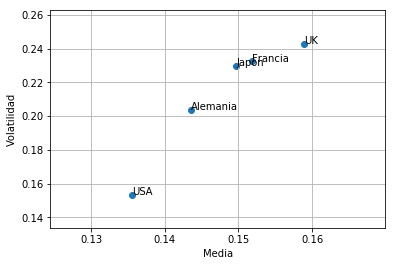

In [8]:
plt.scatter(annual_ret_summ.loc['Media'],
            annual_ret_summ.loc['Volatilidad'] )
plt.text(E1, s1,'USA')
plt.text(E2, s2,'UK')
plt.text(E3, s3,'Francia')
plt.text(E4, s4,'Alemania')
plt.text(E5, s5,'Japon')

plt.xlabel('Media')
plt.ylabel('Volatilidad')
plt.grid()
plt.show()

## 2. Portafolios con Japón y Reino Unido (30 puntos)

Usando los datos del punto anterior:

1. Construya la frontera de mínima varianza que representa las posibles combinaciones de portafolios que se pueden crear con los mercados **Japoneses y del Reino Unido** como activos riesgosos. Puedes pensar en ellos como índices de mercado. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [9]:
# 1
# Vector de w variando entre 0 y 1 con n pasos
N=100
w= np.linspace(0,1, N)
# Rendimientos esperados individuales
# Activo1: EU, Activo2:Japon
E1= annual_ret_summ.loc['Media','Japon']
E2= annual_ret_summ.loc['Media','UK']
# Volatilidades individuales
s1= annual_ret_summ.loc['Volatilidad','Japon']
s2= annual_ret_summ.loc['Volatilidad','UK']
# Correlacion
r12=corr.loc['Japon','UK']
E1,E2,s1,s2

(0.1497, 0.1589, 0.2298, 0.243)

In [10]:
# Crear un DataFrame cuyas columnas sean rendimiento
# y volatilidad del portafolio para cada una de las w
# generadas
portafolios2=pd.DataFrame(data={'w':w,
                               'Media':w*E1+(1-w)*E2,
                               'Vol':((w*s1)**2+((1-w)*s2)**2+2*w*(1-w)*s1*s2*r12)**0.5})
portafolios2.head()

,w,Media,Vol
0,0.000000,0.158900,0.243000
1,0.010101,0.158807,0.241386
2,0.020202,0.158714,0.239793
3,0.030303,0.158621,0.238219
4,0.040404,0.158528,0.236666


In [11]:
# 2
# Importar el módulo optimize
import scipy.optimize as opt

In [12]:
# Función objetivo
def varianza(w,s1,s2,r12):
    return (w*s1)**2+((1-w)*s2)**2+2*w*(1-w)*s1*s2*r12
# Dato inicial
w0=0.5
# Cota de w
bnd=((0,1),)
# Solución
minvar= opt.minimize(fun=varianza,x0=w0, args=(s1,s2,r12),bounds=bnd)
minvar

      fun: array([0.03782716])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.08166817e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 2
   status: 0
  success: True
        x: array([0.54342238])

In [13]:
# Peso del portafolio de minima varianza
minvar.x, 1-minvar.x

(array([0.54342238]), array([0.45657762]))

In [14]:
E_minvar=minvar.x*E1+(1-minvar.x)*E2
s_minvar= varianza(minvar.x,s1,s2,r12)**0.5
#s_minvar=minvar.fun**0.5
E_minvar,s_minvar

(array([0.15390051]), array([0.19449207]))

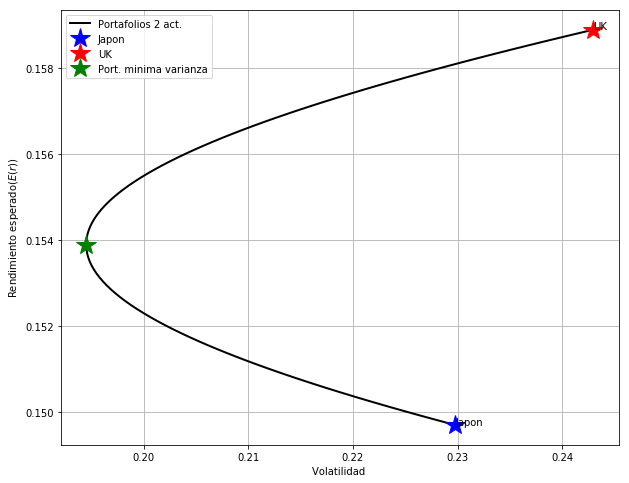

In [15]:
# Graficar el portafolio de varianza mínima
# sobre el mismo gráfico realizado anteriormente
plt.figure(figsize=(10,8))
plt.plot(portafolios2['Vol'],portafolios2['Media'],'k',lw=2
         ,label='Portafolios 2 act.')

plt.plot(s1, E1, 'b*',ms=20,label='Japon')
plt.plot(s2, E2, 'r*',ms=20,label='UK')
plt.plot(s_minvar,E_minvar, 'g*',ms=20,label='Port. minima varianza')
plt.text(s1,E1,'Japon')
plt.text(s2,E2,'UK')
plt.xlabel('Volatilidad ')
plt.ylabel('Rendimiento esperado($E(r)$)')
plt.legend(loc='best')
plt.grid()
plt.show()

Para obtener el portafolio de mínima varianza debemos de invertir 54.3% de nuestro portafolio en Japón y el reso en el Reino Unido

## 3. Mismos activos, distinta correlación (30 puntos)

En este punto se usarán los mismos activos (Japón y Reino Unido) con sus rendimientos esperados y volatilidades, solo que supondremos que el coeficiente de correlación entre sus rendimiento es de 0.5.

1. Nuevamente, construya la frontera de mínima varianza para estos dos activos con el nuevo supuesto de correlación. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [16]:
#mostramos los datos de nuevo
new_corr= 0.5
annual_ret_summ.round(4)

,USA,UK,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [17]:
new_port=pd.DataFrame(data={'w':w,
                               'Media':w*E1+(1-w)*E2,
                               'Vol':((w*s1)**2+((1-w)*s2)**2+2*w*(1-w)*s1*s2*new_corr)**0.5})
new_port.head()

,w,Media,Vol
0,0.000000,0.158900,0.243000
1,0.010101,0.158807,0.241714
2,0.020202,0.158714,0.240446
3,0.030303,0.158621,0.239194
4,0.040404,0.158528,0.237960


In [18]:
minvar2= opt.minimize(fun=varianza,x0=w0, args=(s1,s2,new_corr),bounds=bnd)
minvar2

      fun: array([0.04175078])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.38777878e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 2
   status: 0
  success: True
        x: array([0.55570731])

In [19]:
# Peso del portafolio de minima varianza
minvar2.x, 1-minvar2.x

(array([0.55570731]), array([0.44429269]))

In [20]:
E_minvar_new=minvar2.x*E1+(1-minvar2.x)*E2
s_minvar_new= varianza(minvar2.x,s1,s2,new_corr)**0.5
E_minvar,s_minvar

(array([0.15390051]), array([0.19449207]))

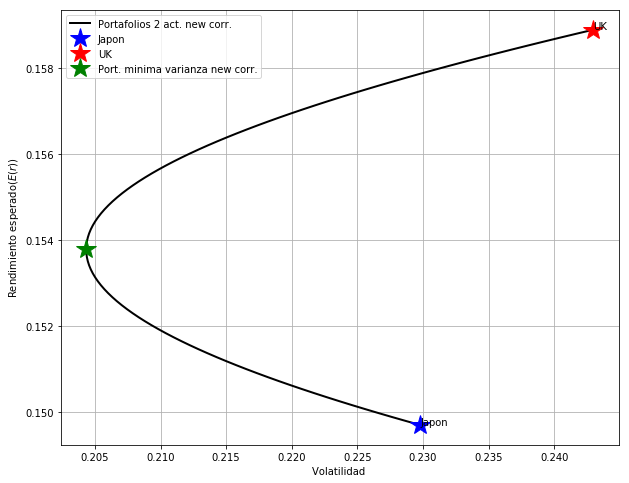

In [21]:
# Graficar el portafolio de varianza mínima
# sobre el mismo gráfico realizado anteriormente
plt.figure(figsize=(10,8))
plt.plot(new_port['Vol'],new_port['Media'],'k',lw=2
         ,label='Portafolios 2 act. new corr.')

plt.plot(s1, E1, 'b*',ms=20,label='Japon')
plt.plot(s2, E2, 'r*',ms=20,label='UK')
plt.plot(s_minvar_new,E_minvar_new, 'g*',ms=20,label='Port. minima varianza new corr.')
plt.text(s1,E1,'Japon')
plt.text(s2,E2,'UK')
plt.xlabel('Volatilidad ')
plt.ylabel('Rendimiento esperado($E(r)$)')
plt.legend(loc='best')
plt.grid()
plt.show()

Con el cambio que hicimos en la correlación ahora debemos adquirir 55.6% de nuestro portafolio en Japón y 44.4% restante en Reino Unido para que obtengamos el portafolio en la frontera de mínima varianza.

## 4. Gráficos y conclusiones (30 puntos)

1. Usando sus respuestas para los puntos 2 y 3, grafique las dos fronteras encontradas en una sola gráfica, además de los puntos correspondientes a los activos individuales, donde el eje $x$ es la volatilidad y el eje $y$ el rendimiento esperado. Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Concluya acerca de la gráfica de las dos fronteras de mínima varianza. ¿Cuál provee más diversificación?, ¿cómo se diferencian?, ¿son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?, ¿cómo puede explicar esta diferencia? (15 puntos).

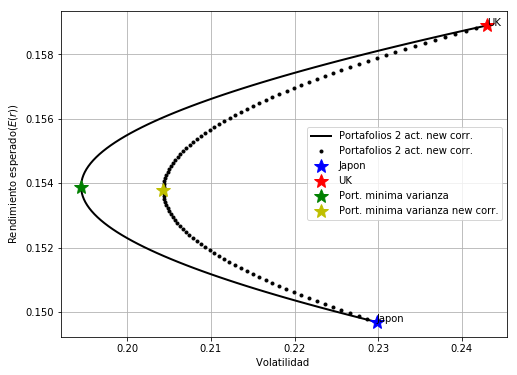

In [22]:
plt.figure(figsize=(8,6))
plt.plot(portafolios2['Vol'],portafolios2['Media'],'k',lw=2 #2
         ,label='Portafolios 2 act. new corr.')

plt.plot(new_port['Vol'],new_port['Media'],'k.',lw=2 #3
         ,label='Portafolios 2 act. new corr.')

plt.plot(s1, E1, 'b*',ms=15,label='Japon')
plt.plot(s2, E2, 'r*',ms=15,label='UK')
plt.plot(s_minvar,E_minvar, 'g*',ms=15,label='Port. minima varianza')#2
plt.plot(s_minvar_new,E_minvar_new, 'y*',ms=15,label='Port. minima varianza new corr.')#3
plt.text(s1,E1,'Japon')
plt.text(s2,E2,'UK')
plt.xlabel('Volatilidad ')
plt.ylabel('Rendimiento esperado($E(r)$)')
plt.legend(loc='best')
plt.grid()
plt.show()

In [23]:
#recordamos los pesos 
minvar2.x, 1-minvar2.x,minvar.x, 1-minvar.x

(array([0.55570731]),
 array([0.44429269]),
 array([0.54342238]),
 array([0.45657762]))

**Conclusiones**

Con la modificación de correlación entre los portafolios que hemos simulado podemos observar un cambio en las fronteras de mínima varianza. y al utilizar la correlación que nos dieron en el punto 3 se redujo la forntera de mínima varianza. Por lo tanto, al aumentar la correlación podemos decir que disminuiremos nuestra frontera de mínima varianza. 
    
Los pesos de los activos entre los portafolios en la frontera del punto 2 y el 3 son casi iguales. Sin embargo, si vemos cambios significativos en los demás puntos de las fronteras, a menor correlación entre los activos podemos obtener una diversificación mayor. 
    

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>